# Student Depression Prediction using ANN

## Importing Libraries

In [63]:
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Loading Dataset

In [64]:
import kagglehub

dataset_path = kagglehub.dataset_download('aldinwhyudii/student-depression-and-lifestyle-100k-data')
csv_file_path = f'{dataset_path}/student_lifestyle_100k.csv'

print(f"Dataset downloaded to: {dataset_path}")
print(f"CSV file path: {csv_file_path}")

Using Colab cache for faster access to the 'student-depression-and-lifestyle-100k-data' dataset.
Dataset downloaded to: /kaggle/input/student-depression-and-lifestyle-100k-data
CSV file path: /kaggle/input/student-depression-and-lifestyle-100k-data/student_lifestyle_100k.csv


In [65]:
df = pd.read_csv(csv_file_path)

## Preprocessing Dataset

### Cleaning and Take a Look at Dataset

In [66]:
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [67]:
df.shape

(100000, 11)

In [68]:
df['Depression'].value_counts()

,count
Depression,
False,89938
True,10062


In [69]:
df.isna().sum()

,0
Student_ID,0
Age,0
Gender,0
Department,0
CGPA,0
Sleep_Duration,0
Study_Hours,0
Social_Media_Hours,0
Physical_Activity,0
Stress_Level,0


In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.drop(columns=['Student_ID'], inplace=True)

In [72]:
df.head()

,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [73]:
df['Department'].value_counts()

,count
Department,
Science,20071
Engineering,20057
Arts,19998
Medical,19964
Business,19910


### Preprocess Pipeline

In [74]:
numeric_features = [
    'Age', 'CGPA', 'Sleep_Duration', 'Study_Hours', 
    'Social_Media_Hours', 'Physical_Activity', 'Stress_Level'
]


one_hot_encode_features = ['Department']
ordinal_features = ['Gender']

# 2. Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # Apply scaling to numeric data
        ('num', StandardScaler(), numeric_features),
        # Apply one-hot encoding to categorical data
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), one_hot_encode_features),
        ('ordinal_features', OrdinalEncoder(), ordinal_features),
    ],
    # 'remainder' tells it what to do with columns not mentioned (like 'Depression')
    # Use 'passthrough' to keep them or 'drop' to remove them
    remainder='drop' 
)

In [75]:
df['Depression'] = df['Depression'].astype('int')

In [76]:
df.head()

,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,22,Female,Science,3.50,7.3,3.3,3.4,114,5,0
1,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,0
2,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,0
3,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,0
4,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,0


In [77]:
df['Depression'].value_counts()

,count
Depression,
0,89938
1,10062


### Splitting in X and y

In [78]:
X = df.drop(columns=['Depression'])
y = df['Depression']

In [79]:
X

,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level
0,22,Female,Science,3.50,7.3,3.3,3.4,114,5
1,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2
2,20,Male,Medical,3.01,5.4,2.3,1.8,137,3
3,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3
4,19,Male,Arts,3.14,6.8,2.6,4.3,4,6
...,...,...,...,...,...,...,...,...,...
99995,24,Female,Medical,2.02,7.0,0.6,1.4,66,4
99996,24,Male,Arts,2.33,5.0,3.6,5.2,103,3
99997,24,Female,Engineering,2.23,6.5,5.8,4.1,61,5
99998,19,Male,Engineering,3.61,6.1,4.8,4.9,116,4


In [80]:
y

,Depression
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


### Splitting Dataset into Training and Testing Sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [83]:
X_train

array([[-1.504036  , -1.47952283,  0.40547836, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.4946526 , -0.31440643, -0.52996788, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49508973, -0.31440643,  0.53911353, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.0046917 ,  0.96346318,  0.87320147, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0046917 , -0.97213343, -0.73042064, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0046917 ,  1.00104758,  1.60819494, ...,  1.        ,
         0.        ,  0.        ]])

In [84]:
X_test

array([[-1.00425456, -1.14126323, -1.33177893, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.99487117,  1.56481358,  0.13820801, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0046917 , -0.55870503,  0.20502559, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.49508973,  1.05742418, -0.32951511, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00425456, -0.61508163,  0.13820801, ...,  0.        ,
         0.        ,  1.        ],
       [-1.504036  , -0.59628943,  1.80864771, ...,  0.        ,
         1.        ,  1.        ]])

In [85]:
y_train.value_counts()

,count
Depression,
0,71943
1,8057


### Using SMOTE to handle class imbalance

In [86]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [87]:
y_train.value_counts()

,count
Depression,
0,71943
1,71943


In [88]:
y_train.shape

(143886,)

In [89]:
X_train.shape

(143886, 13)

## Model - Artificial Neural Network

### Making the ANN Architecture

In [90]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(X_train.shape[1],)),

        tf.keras.layers.Dense(units=512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),

        tf.keras.layers.Dense(units=256, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),

        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),

        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),

        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ]
)

### Summary of Model

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,713 (702.00 KB)

 Trainable params: 179,713 (702.00 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model

In [92]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

### Training Model

In [93]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=128)

Epoch 1/10


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6687 - loss: 0.6303 - val_accuracy: 0.7113 - val_loss: 0.5935
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6938 - loss: 0.6103 - val_accuracy: 0.7303 - val_loss: 0.6249
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6968 - loss: 0.6014 - val_accuracy: 0.7086 - val_loss: 0.6286
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6977 - loss: 0.5951 - val_accuracy: 0.7243 - val_loss: 0.5983
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7035 - loss: 0.5858 - val_accuracy: 0.7157 - val_loss: 0.5989
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7106 - loss: 0.5778 - val_accuracy: 0.7221 - val_loss: 0.5726
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7149 - loss: 0.5691 - val_accuracy: 0.7024 - val_loss: 0.6142
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7200 - loss: 0.5593 - val_accura

### Predictions

In [94]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


### Confusion Matrix

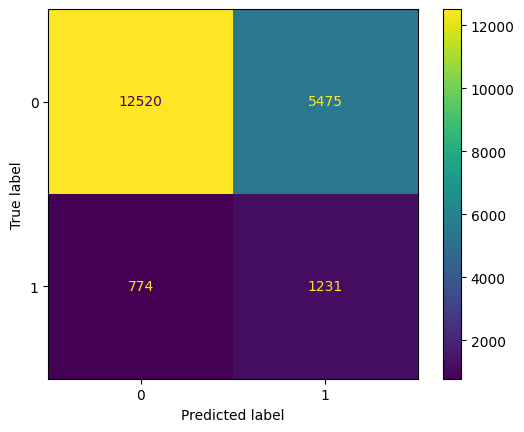

In [95]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(
    confusion_matrix=cm
).plot()


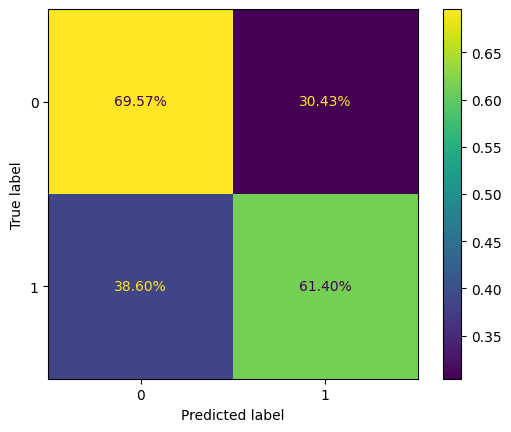

In [96]:
cm = confusion_matrix(y_test,y_pred,normalize='true')
ConfusionMatrixDisplay(
    confusion_matrix=cm
).plot(values_format='.2%')


In [97]:
y_test.value_counts()

,count
Depression,
0,17995
1,2005
